In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets-tumer/no/34 no.jpg
/kaggle/input/datasets-tumer/no/N20.JPG
/kaggle/input/datasets-tumer/no/N1.JPG
/kaggle/input/datasets-tumer/no/49 no.jpg
/kaggle/input/datasets-tumer/no/N15.jpg
/kaggle/input/datasets-tumer/no/No18.jpg
/kaggle/input/datasets-tumer/no/31 no.jpg
/kaggle/input/datasets-tumer/no/no 6.jpg
/kaggle/input/datasets-tumer/no/3 no.jpg
/kaggle/input/datasets-tumer/no/no 5.jpeg
/kaggle/input/datasets-tumer/no/no 1.jpg
/kaggle/input/datasets-tumer/no/26 no.jpg
/kaggle/input/datasets-tumer/no/N26.JPG
/kaggle/input/datasets-tumer/no/N5.jpg
/kaggle/input/datasets-tumer/no/6 no.jpg
/kaggle/input/datasets-tumer/no/No21.jpg
/kaggle/input/datasets-tumer/no/17 no.jpg
/kaggle/input/datasets-tumer/no/No22.jpg
/kaggle/input/datasets-tumer/no/29 no.jpg
/kaggle/input/datasets-tumer/no/46 no.jpg
/kaggle/input/datasets-tumer/no/32 no.jpg
/kaggle/input/datasets-tumer/no/42 no.jpg
/kaggle/input/datasets-tumer/no/no 90.jpg
/kaggle/input/datasets-tumer/no/no 94.jpg
/kaggle/inp

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers


2025-06-17 19:18:03.008845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750187883.242189      59 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750187883.313719      59 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_ds = image_dataset_from_directory(
    '/kaggle/input/datasets-tumer/brain_tumor_dataset',
    labels='inferred',
    label_mode='binary',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    '/kaggle/input/datasets-tumer/brain_tumor_dataset',
    labels='inferred',
    label_mode='binary',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 253 files belonging to 2 classes.
Using 203 files for training.


I0000 00:00:1750187896.912094      59 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750187896.912759      59 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [4]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
])

# Load EfficientNet
base_model = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True  # Enable fine-tuning!

# Build final model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,858,704 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,  # Increase if needed
    callbacks=[early_stop, checkpoint]
)


Epoch 1/25


In [ ]:
train_loss, train_acc = model.evaluate(train_ds, verbose=0)
val_loss, val_acc = model.evaluate(val_ds, verbose=0)

print(f"✅ Recalculated Train Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Recalculated Test Accuracy: {val_acc * 100:.2f}%")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = '/kaggle/input/datasets-tumer/yes/Y108.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)
plt.axis(False)
plt.title("Test Image")
plt.show()

pred = model.predict(img_array)[0][0]
print("Prediction probability:", pred)

print("✅ Tumor Detected" if pred > 0.5 else "❌ No Tumor")


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Extract labels from dataset
all_labels = []
for _, labels in train_ds.unbatch():
    all_labels.append(int(labels.numpy()))

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)

# Convert to dict
class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weights)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights  # << ADD THIS!
)


In [ ]:
train_loss, train_acc = model.evaluate(train_ds, verbose=0)
val_loss, val_acc = model.evaluate(val_ds, verbose=0)

print(f"✅ Recalculated Train Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Recalculated Test Accuracy: {val_acc * 100:.2f}%")

In [ ]:
train_ds = image_dataset_from_directory(
    '/kaggle/input/datasets-tumer/brain_tumor_dataset',
    labels='inferred',
    label_mode='binary',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    '/kaggle/input/datasets-tumer/brain_tumor_dataset',
    labels='inferred',
    label_mode='binary',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import tensorflow.keras.backend as K

# ✅ Define custom binary focal loss
def binary_focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        p_t = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        alpha_t = tf.where(K.equal(y_true, 1), alpha, 1 - alpha)
        loss = -alpha_t * K.pow(1 - p_t, gamma) * K.log(p_t)
        return K.mean(loss)
    return focal_loss_fixed

# ✅ Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = True  # Fine-tune all layers

# ✅ Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
])

# ✅ Define the model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# ✅ Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# ✅ Compile the model using custom focal loss
model.compile(
    optimizer='adam',
    loss=binary_focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy']
)

# ✅ Show model architecture
model.summary()



In [ ]:
import tensorflow as tf

# Check GPU
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow is using GPU:", tf.test.is_gpu_available(cuda_only=True))


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,  # Increase if needed
    callbacks=[early_stop, checkpoint]
)

In [ ]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

In [ ]:
import os

no_count = len(os.listdir('/kaggle/input/datasets-tumer/no'))
yes_count = len(os.listdir('/kaggle/input/datasets-tumer/yes'))

print("No Tumor:", no_count)
print("Yes Tumor:", yes_count)


**Main MOdel**

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# =======================
# 1. Load Dataset
# =======================
DATASET_PATH = "/kaggle/input/datasets-tumer/brain_tumor_dataset"
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# =======================
# 2. Data Augmentation & Normalization
# =======================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)

# =======================
# 3. Compute Class Weights
# =======================
labels = []
for _, y in train_ds.unbatch():
    labels.append(int(y.numpy().item()))

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# =======================
# 4. Build Model
# =======================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# =======================
# 5. Warm-up Training
# =======================
print("\n🔧 Warm-up training...")
model.fit(train_ds, validation_data=val_ds, epochs=5, class_weight=class_weights_dict)

# =======================
# 6. Fine-tuning
# =======================
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/kaggle/working/best_model_1.h5', save_best_only=True, monitor='val_accuracy', verbose=1)
]

print("\n🎯 Fine-tuning training...")
history = model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=callbacks, class_weight=class_weights_dict)

# =======================
# 7. Load Best Model
# =======================
best_model = load_model('/kaggle/working/best_model_1.h5')

# =======================
# 8. Evaluation
# =======================
results = best_model.evaluate(val_ds)
print("\n✅ Loaded Best Model Evaluation:")
for metric, value in zip(best_model.metrics_names, results):
    print(f"{metric}: {value:.4f}")

best_val_acc = max(history.history['val_accuracy'])
print(f"\n🔥 Best Validation Accuracy Achieved: {best_val_acc:.4f}")

# =======================
# 9. Classification Report
# =======================
y_true, y_pred = [], []
for images, labels in val_ds:
    preds = best_model.predict(images).flatten()
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int))

print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.

🔧 Warm-up training...
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 434ms/step - accuracy: 0.6024 - loss: 0.7140 - precision_4: 0.6868 - recall_4: 0.4847 - val_accuracy: 0.7800 - val_loss: 0.6215 - val_precision_4: 0.8387 - val_recall_4: 0.8125
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7111 - loss: 0.6292 - precision_4: 0.7397 - recall_4: 0.7980 - val_accuracy: 0.8000 - val_loss: 0.5397 - val_precision_4: 0.8438 - val_recall_4: 0.8438
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7502 - loss: 0.6310 - precision_4: 0.7665 - recall_4: 0.8566 - val_accuracy: 0.7600 - val_loss: 0.5626 - val_precision_4: 0.9167 - val_recall_4: 0.6875
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7109 - loss: 0.5405 - precision_4: 0.8488 - recall_4: 0.6062 - val_accuracy: 0.7400 - val_loss: 0.5508 - val_precision_4: 0.9524 -

In [9]:
import os
print(os.listdir())


['.virtual_documents', 'best_model_1.h5']


In [22]:
model = tf.keras.models.load_model("/kaggle/working/best_model_1.h5")


In [25]:
base_model = model.get_layer('mobilenetv2_1.00_224')


In [26]:
for layer in reversed(base_model.layers):
    if 'conv' in layer.name and 'conv_pw' not in layer.name:
        print("Last conv layer:", layer.name)
        last_conv_layer_name = layer.name
        break


Last conv layer: expanded_conv_project_BN


In [19]:
from datetime import datetime
import os

# Create a folder to store multiple versions
os.makedirs("/kaggle/working/models", exist_ok=True)

# Generate a unique filename using date + time
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
versioned_model_path = f"/kaggle/working/models/best_model_{timestamp}.h5"

# Save the model
model.save(versioned_model_path)

print(f"✅ Model saved as {versioned_model_path}")


✅ Model saved as /kaggle/working/models/best_model_20250618_093605.h5


**Sub Model**

In [31]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# =======================
# 1. Load Dataset
# =======================
DATASET_PATH = "/kaggle/input/datasets-tumer/brain_tumor_dataset"
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='binary',  # This is correct for multi-class
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


# =======================
# 2. Data Augmentation & Normalization
# =======================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

normalization_layer = tf.keras.layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)

# =======================
# 3. Compute Class Weights
# =======================
labels = []
for _, y in train_ds.unbatch():
    labels.append(int(y.numpy().item()))


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# =======================
# 4. Build Model
# =======================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # <-- Multiclass output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# =======================
# 5. Warm-up Training
# =======================
print("\n🔧 Warm-up training...")
model.fit(train_ds, validation_data=val_ds, epochs=5, class_weight=class_weights_dict)

# =======================
# 6. Fine-tuning
# =======================
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/kaggle/working/best_model.h5', save_best_only=True, monitor='val_accuracy', verbose=1)
]

print("\n🎯 Fine-tuning training...")
history = model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=callbacks, class_weight=class_weights_dict)


from tensorflow.keras.models import load_model

best_model = load_model('/kaggle/working/best_model_1.h5')

# =======================

# =======================
# 9. Evaluation
# =======================

# Evaluate or use
results = best_model.evaluate(val_ds)
print("\n✅ Loaded Best Model Evaluation:")
for metric, value in zip(best_model.metrics_names, results):
    print(f"{metric}: {value:.4f}")


best_val_acc = max(history.history['val_accuracy'])
print(f"🔥 Best Validation Accuracy Achieved: {best_val_acc:.4f}")

# =======================
# 8. Classification Report
# =======================
y_true, y_pred = [], []
for images, labels in val_ds:
    preds = model.predict(images).flatten()  # sigmoid outputs
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int))

print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.

🔧 Warm-up training...
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 432ms/step - accuracy: 0.4244 - loss: 0.9583 - precision_8: 0.5419 - recall_8: 0.1175 - val_accuracy: 0.6600 - val_loss: 0.6441 - val_precision_8: 0.6667 - val_recall_8: 0.9375
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6971 - loss: 0.7222 - precision_8: 0.7095 - recall_8: 0.8833 - val_accuracy: 0.7400 - val_loss: 0.5873 - val_precision_8: 0.7317 - val_recall_8: 0.9375
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6991 - loss: 0.6536 - precision_8: 0.7564 - recall_8: 0.7781 - val_accuracy: 0.7800 - val_loss: 0.5912 - val_precision_8: 0.9200 - val_recall_8: 0.7188
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6586 - loss: 0.6336 - precision_8: 0.7659 - recall_8: 0.6261 - val_accuracy: 0.8000 - val_loss: 0.5855 - val_precision_8: 1.0000 -

In [27]:
img_path = '/kaggle/input/datasets-tumer/no/13 no.jpg'  # Or a "no" image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dim
img_array = normalization_layer(img_array)

pred = best_model.predict(img_array)[0][0]
print("\n🔍 Prediction Probability:", pred)
print("✅ Tumor Detected" if pred > 0.4 else "❌ No Tumor")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

🔍 Prediction Probability: 0.19176213
❌ No Tumor


In [3]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from PIL import Image

def get_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def overlay_heatmap(heatmap, image, alpha=0.4):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    output = cv2.addWeighted(image, 1 - alpha, heatmap_colored, alpha, 0)
    return output


In [28]:
import os
print("Working dir contents:", os.listdir('/kaggle/working'))


Working dir contents: ['.virtual_documents', 'best_model.h5']


In [11]:
import os
print(os.listdir('/kaggle/working'))


['.virtual_documents', 'best_model.h5']


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


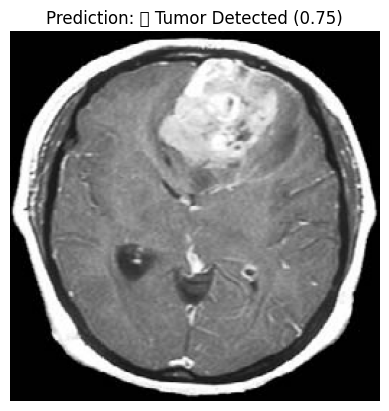

In [29]:
# Step 7: Predict New Image (Not from Dataset)
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # manual normalization
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    label = "✅ Tumor Detected" if prediction > 0.40 else "❌ No Tumor"
   
    # Show result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({prediction:.2f})")
    plt.show()
    


# Example usage
predict_image('/kaggle/input/datasets-tumer/yes/Y13.jpg')




In [22]:
class_weights = {
    0: total/ (2 * no_count),
    1: total/ (2 * yes_count)
}

NameError: name 'total' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


/tmp/ipykernel_35/3586877695.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true = int(labels[i].numpy())
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


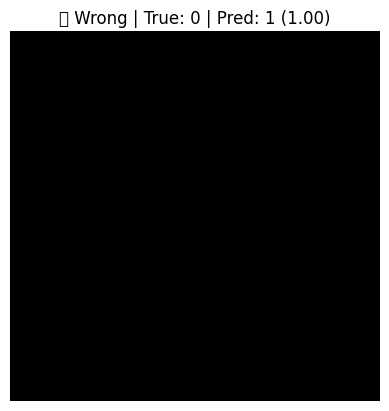

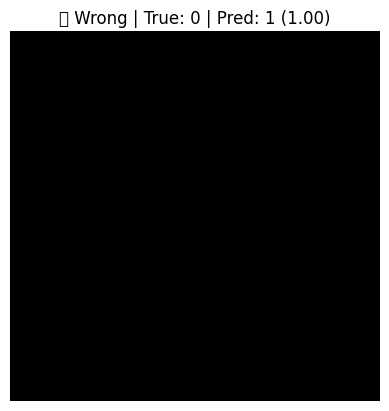

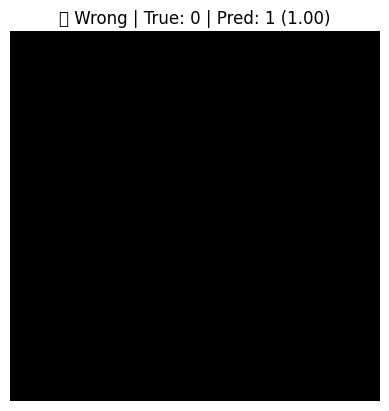

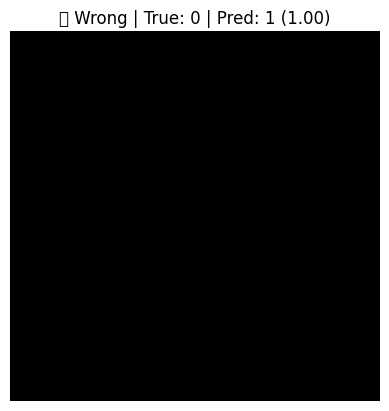

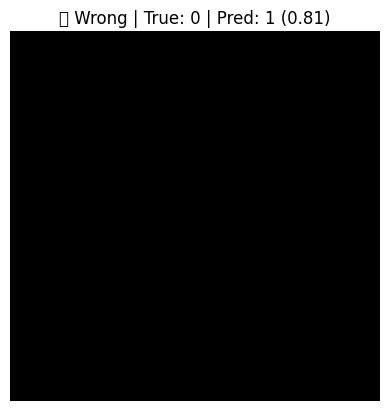

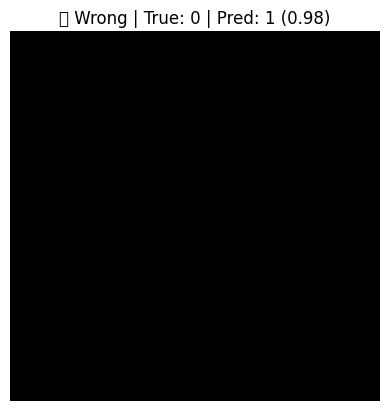

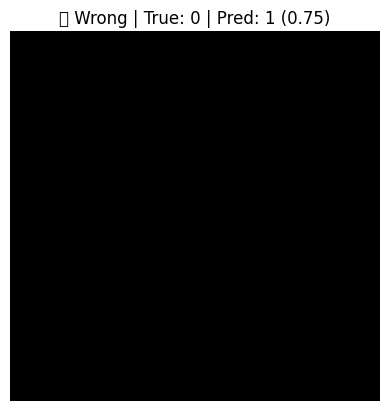

In [18]:
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    for i in range(len(preds)):
        true = int(labels[i].numpy())
        pred = 1 if preds[i][0] > 0.5 else 0
        if true != pred:
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"❌ Wrong | True: {true} | Pred: {pred} ({preds[i][0]:.2f})")
            plt.axis(False)
            plt.show()


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Get class weights
all_labels = []
for _, labels in train_ds.unbatch():
    all_labels.append(int(labels.numpy()))

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weights)

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights
)


In [ ]:
pred = model.predict(img_array)[0][0]
print("Prediction probability:", pred)
print("✅ Tumor Detected" if pred > 0.5 else "❌ No Tumor")


In [ ]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
